In [1]:
!nvidia-smi

Mon Oct  6 11:09:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.2 MB/s eta 0:00:00


In [4]:
## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/YOLO

/content/drive/MyDrive/YOLO


In [6]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.205 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


In [8]:
%cd /content/drive/MyDrive/YOLO/data

!yolo task=detect mode=train model=yolov8l.pt data=data.yaml epochs=50 imgsz=224 plots=True
# !yolo task=detect mode=train model=yolov8l.pt data="/content/drive/MyDrive/ObjectdetectionData/custom.yaml" epochs=100 imgsz=640 batch=8 project="/content/drive/MyDrive/ObjectdetectionData/training_results" name=resultsfinalLarge


/content/drive/MyDrive/YOLO/data
Ultralytics 8.3.205 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

In [9]:
!ls runs/detect/train2


args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch5000.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch5001.jpg  weights
labels.jpg			 train_batch5002.jpg


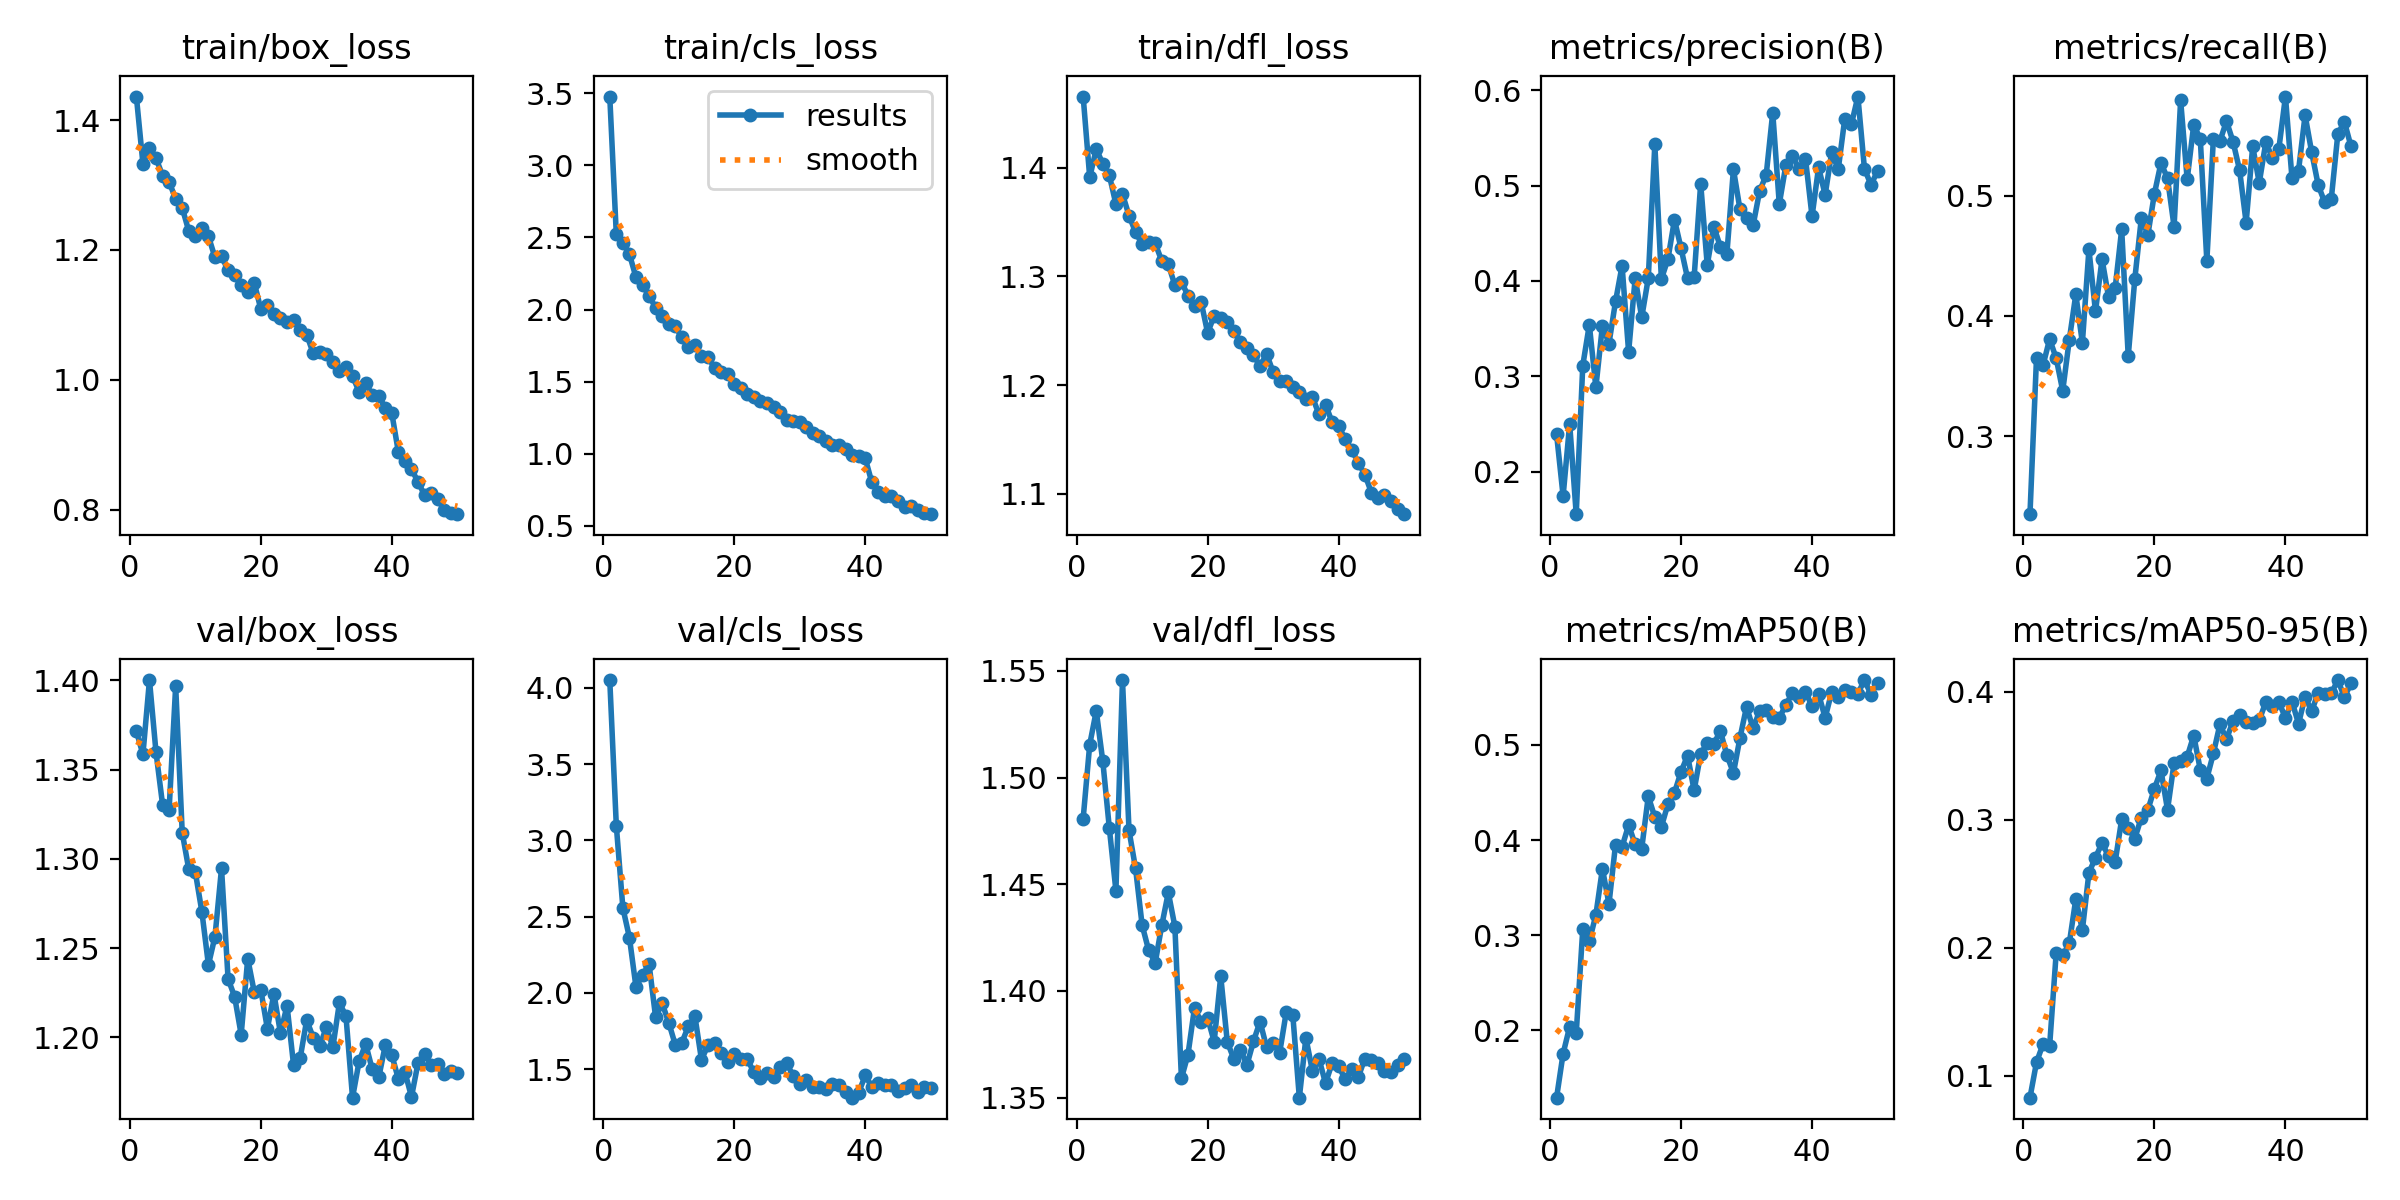

In [11]:
image_path = '/content/drive/MyDrive/YOLO/data/runs/detect/train2/results.png'
Image(filename=image_path, width=600)

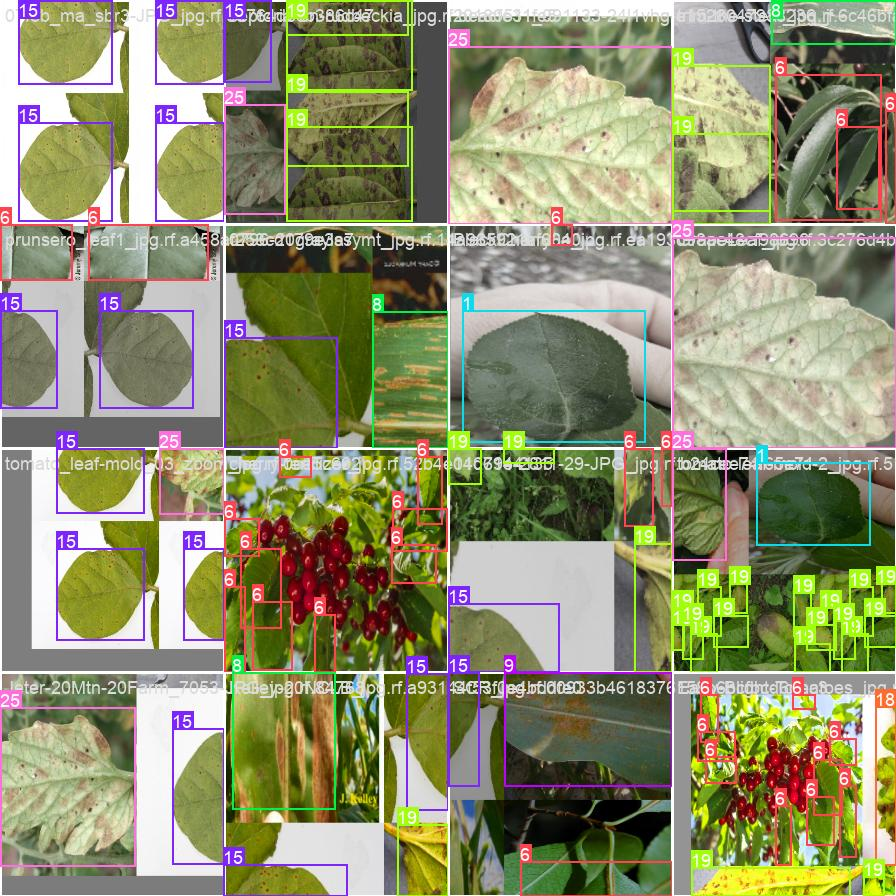

In [12]:
image_path = '/content/drive/MyDrive/YOLO/data/runs/detect/train2/train_batch0.jpg'
Image(filename=image_path, width =600)

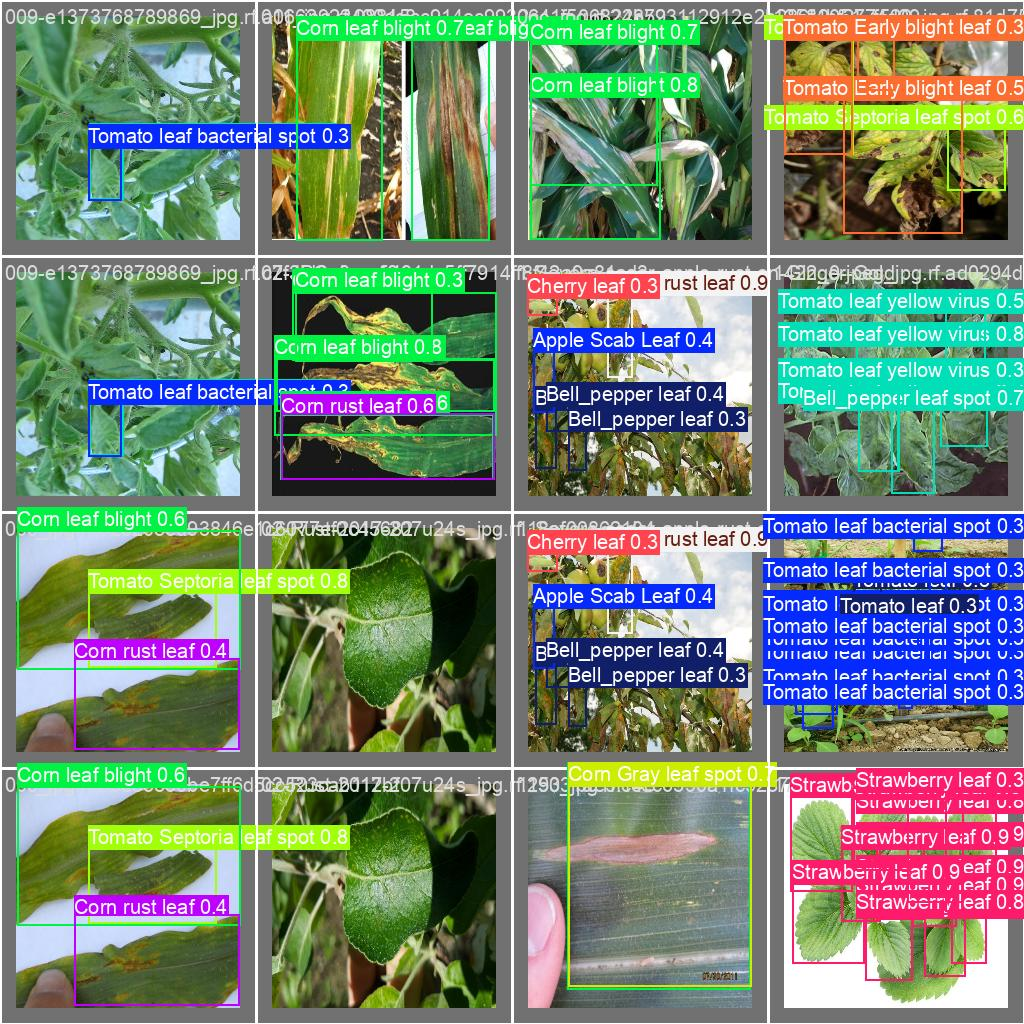

In [13]:
Image(filename='/content/drive/MyDrive/YOLO/data/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [14]:
!yolo task=detect mode=val model="/content/drive/MyDrive/YOLO/data/runs/detect/train2/weights/best.pt" data=/content/drive/MyDrive/YOLO/data/data.yaml

Ultralytics 8.3.205 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,628,967 parameters, 0 gradients, 164.9 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.3 ms, read: 44.0±14.8 MB/s, size: 72.5 KB)
val: Scanning /content/drive/MyDrive/YOLO/data/valid/labels.cache... 249 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 249/249 3.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 4.4it/s 3.6s
                   all        249        883       0.52      0.545      0.568       0.41
       Apple Scab Leaf          6         14      0.544        0.5      0.639      0.448
            Apple leaf          9         23      0.659      0.696       0.75      0.529
       Apple rust leaf         11         39      0.854      0.451      0.575      0.303
      Bell_pepper leaf          3         11      0.402      0.455      0.433      0.324
        Blueberry leaf         13

## **Inference on Test images**

In [15]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/YOLO/data/runs/detect/train2/weights/best.pt" conf=0.25 source="/content/drive/MyDrive/YOLO/data/test/images" save=True


Ultralytics 8.3.205 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,628,967 parameters, 0 gradients, 164.9 GFLOPs

image 1/245 /content/drive/MyDrive/YOLO/data/test/images/022_jpg.rf.db03fecdb4b0082ef982753c6efe4528.jpg: 224x224 1 Corn Gray leaf spot, 1 Corn rust leaf, 18.9ms
image 2/245 /content/drive/MyDrive/YOLO/data/test/images/02b13cea19417b15cf3d6ff534aa7ea653ad783094a60_1260x1260_jpg.rf.055178f22c00759d02da4055a7b271a5.jpg: 224x224 1 Cherry leaf, 19.4ms
image 3/245 /content/drive/MyDrive/YOLO/data/test/images/02b13cea19417b15cf3d6ff534aa7ea653ad783094a60_1260x1260_jpg.rf.3fda403c1782e3c892bb9d90c79442b5.jpg: 224x224 1 Cherry leaf, 19.8ms
image 4/245 /content/drive/MyDrive/YOLO/data/test/images/052609-20Hartman-20Crabapple-20scab-20single-20leaf-JPG_jpg.rf.b85e9ec8724be4fcd52c13004ed751c5.jpg: 224x224 1 Apple Scab Leaf, 24.3ms
image 5/245 /content/drive/MyDrive/YOLO/data/test/images/07c_jpg.rf.96aaa440e570d7dba158419a294f44da.j

In [ ]:
# !cp -r /content/runs/detect/predict /content/drive/MyDrive/ObjectdetectionData/test_results


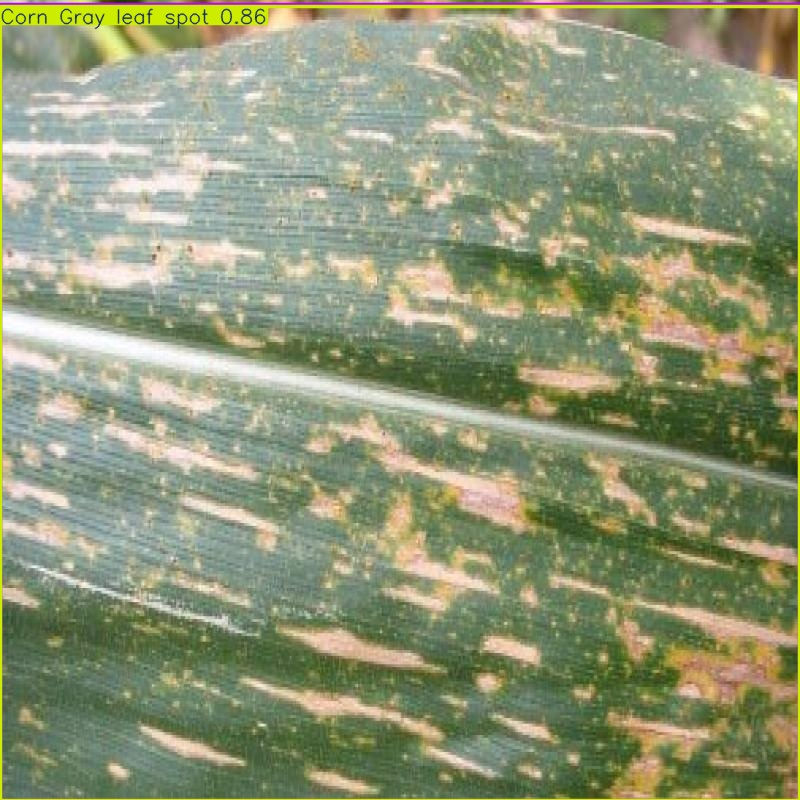

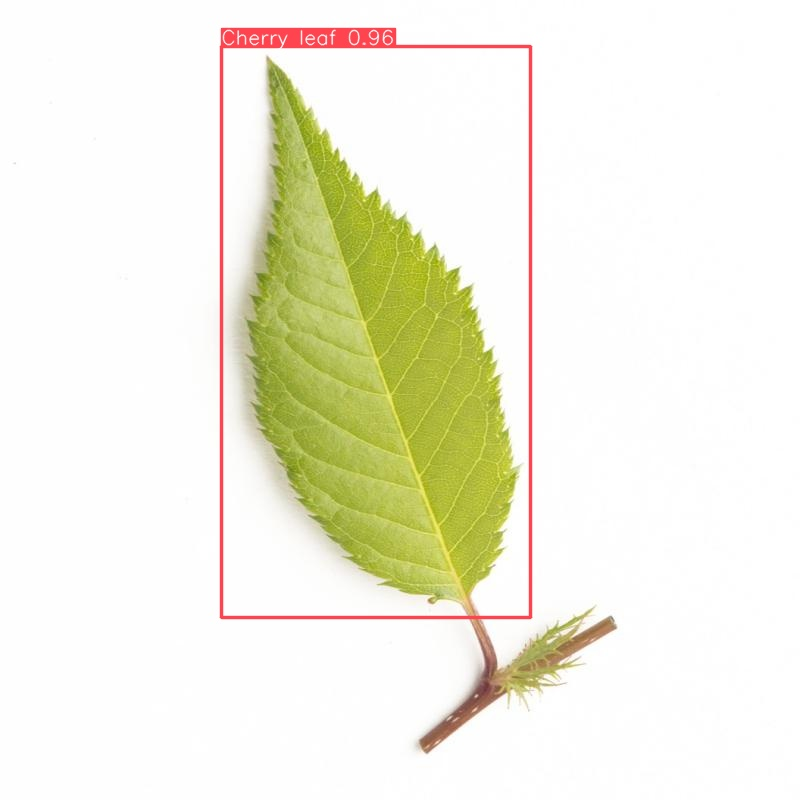

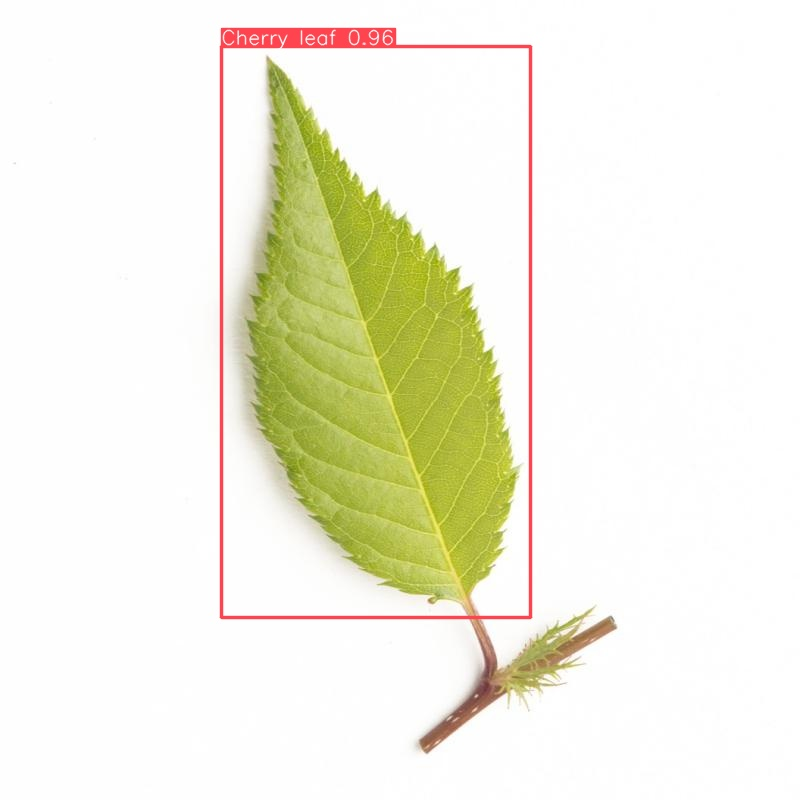

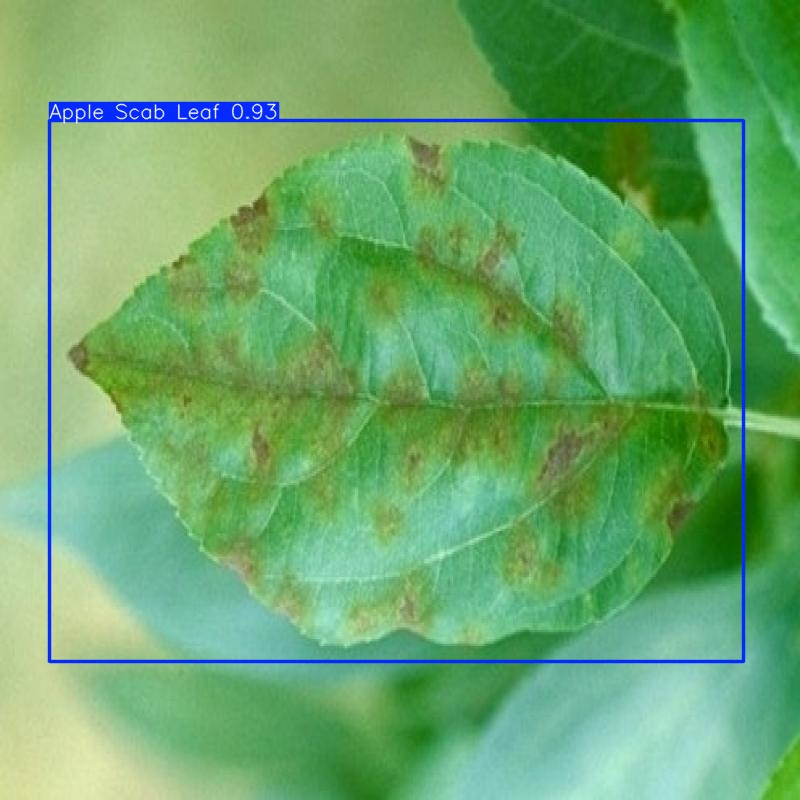

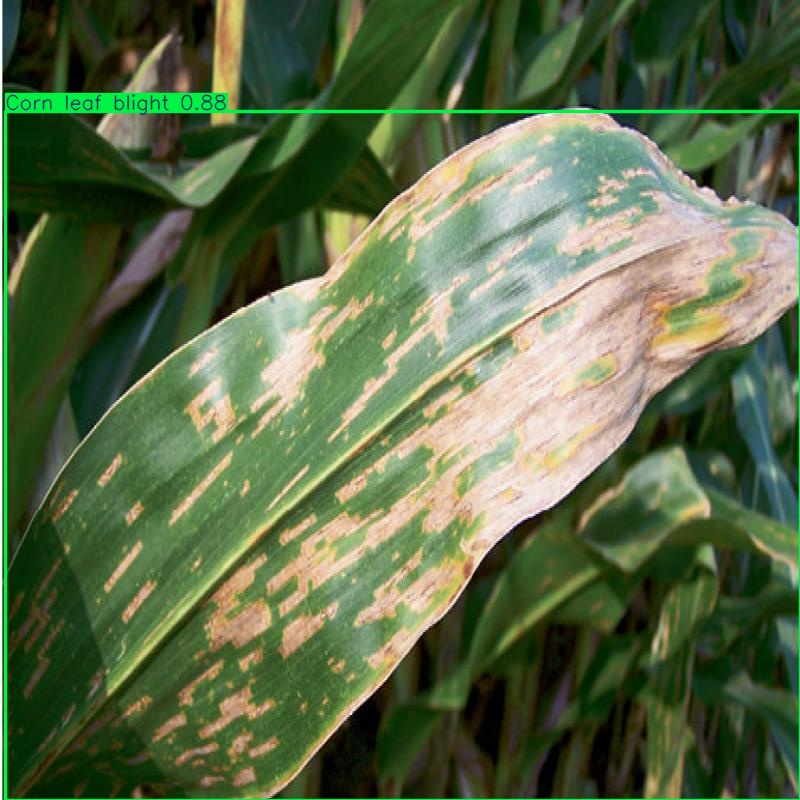

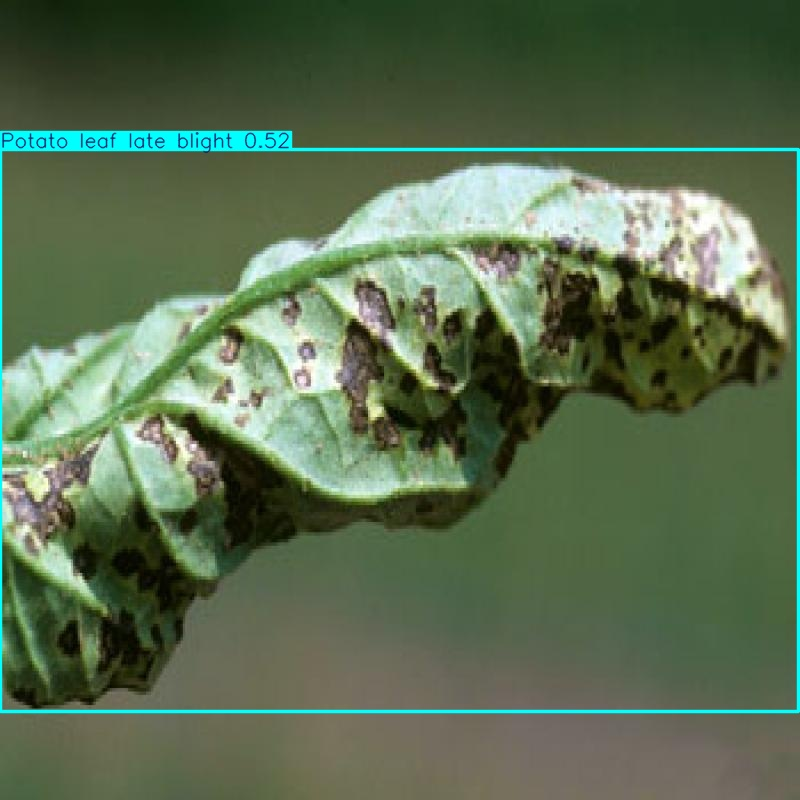

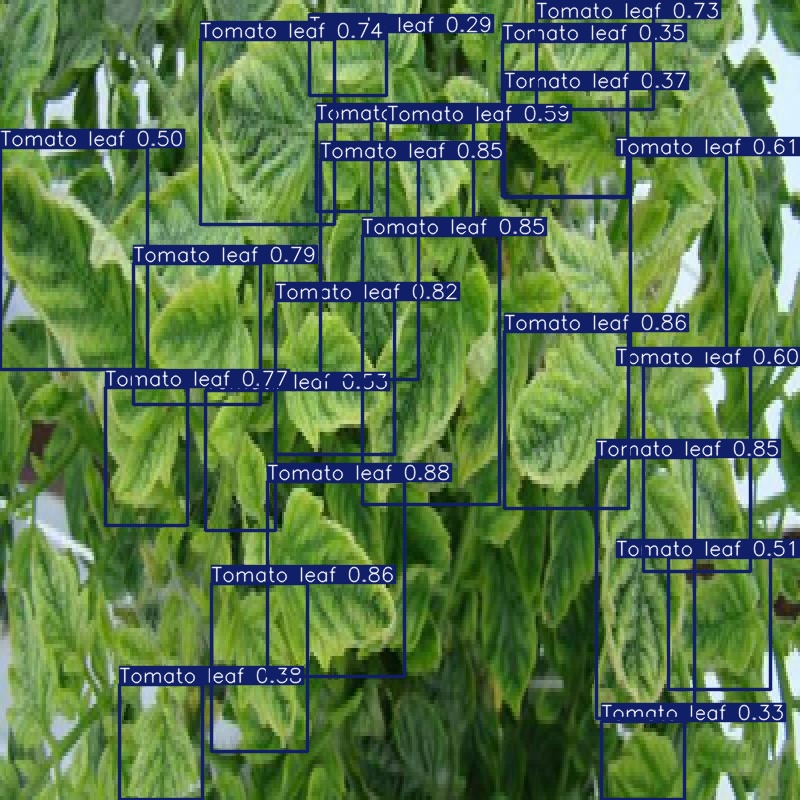

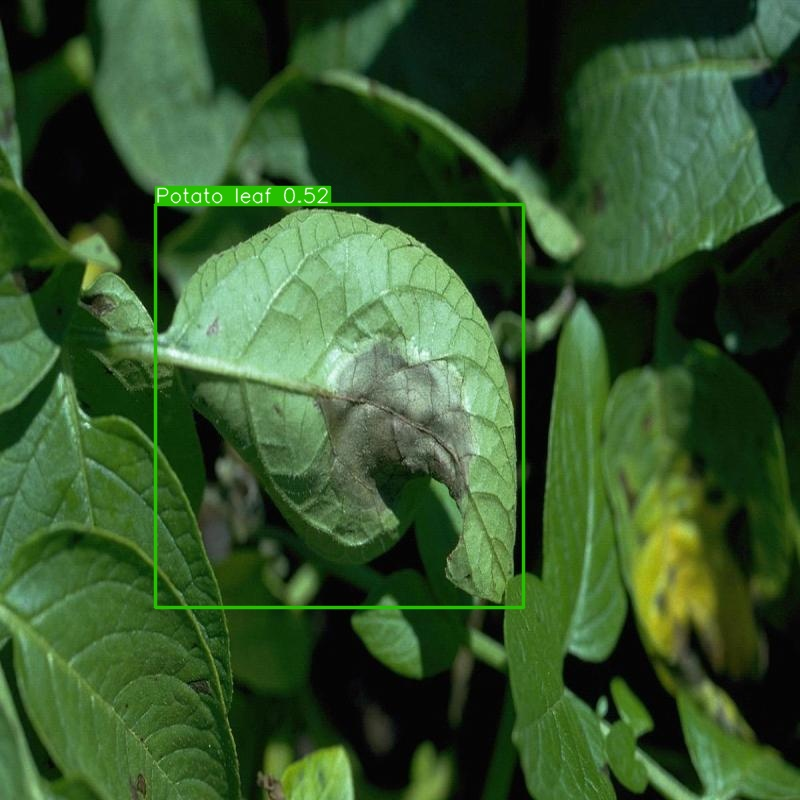

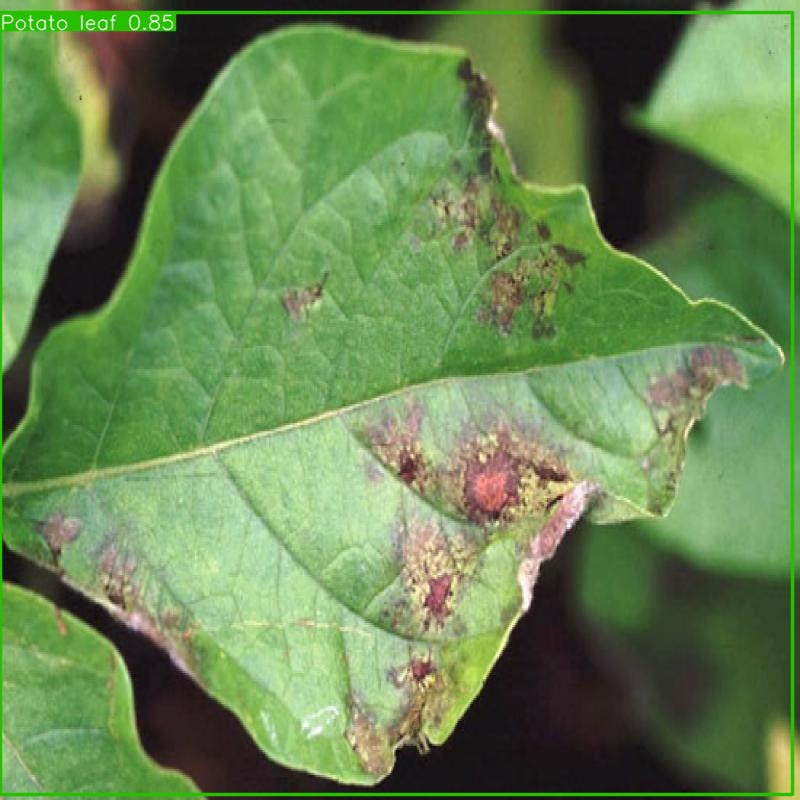

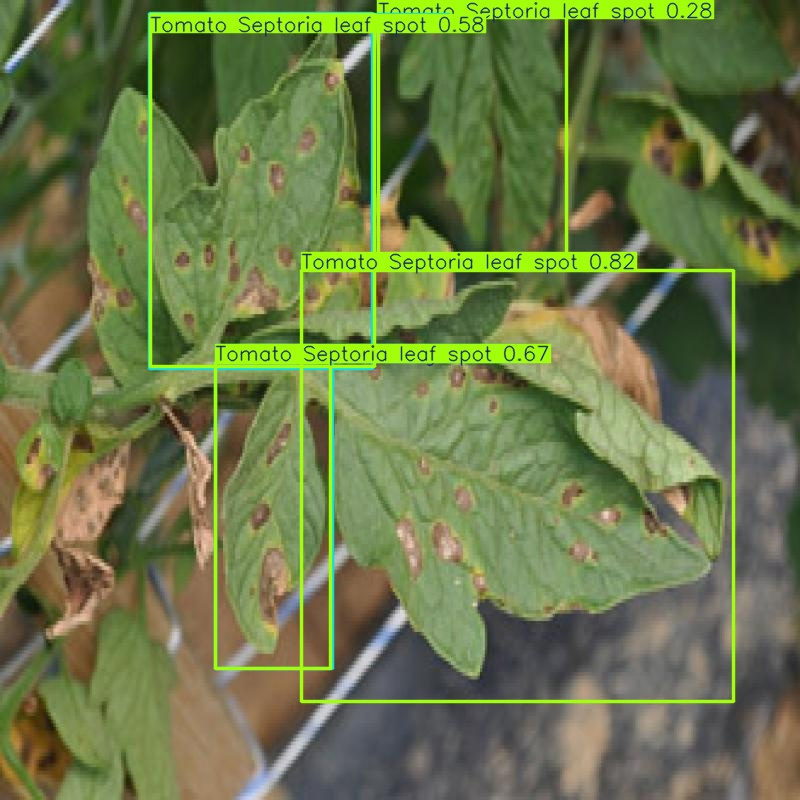

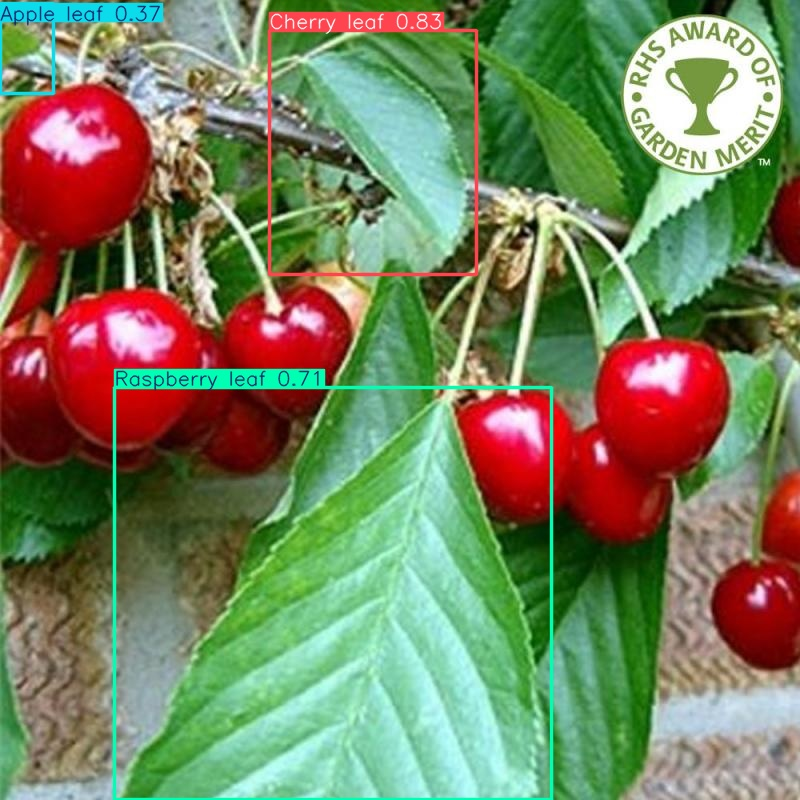

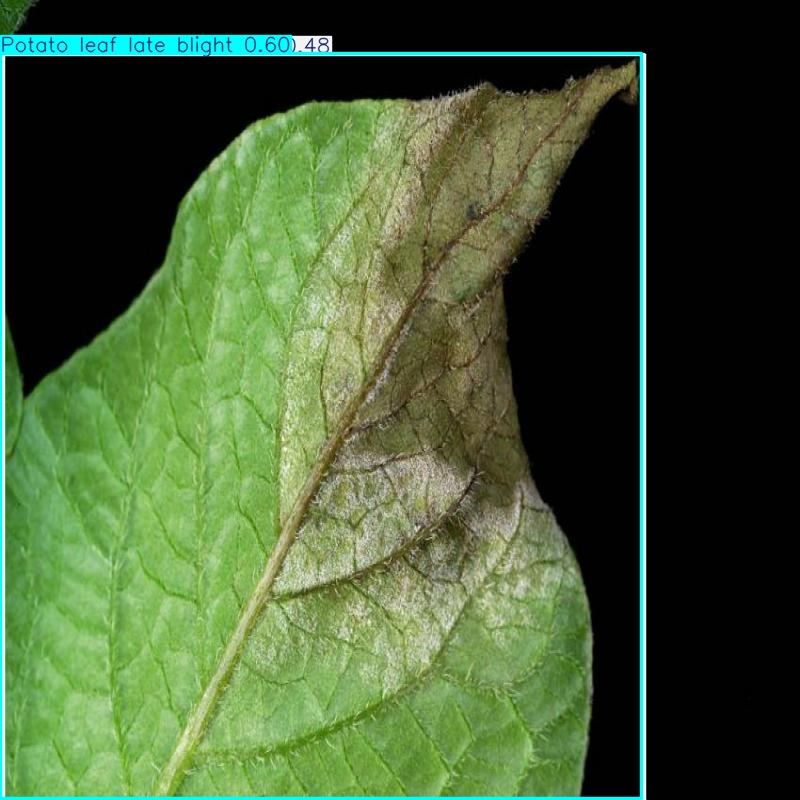

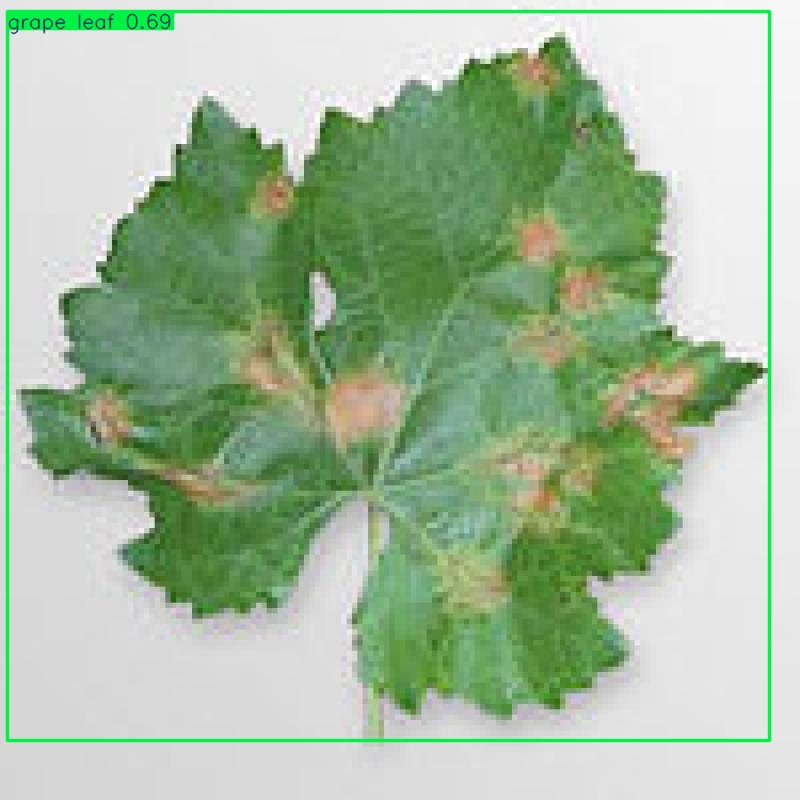

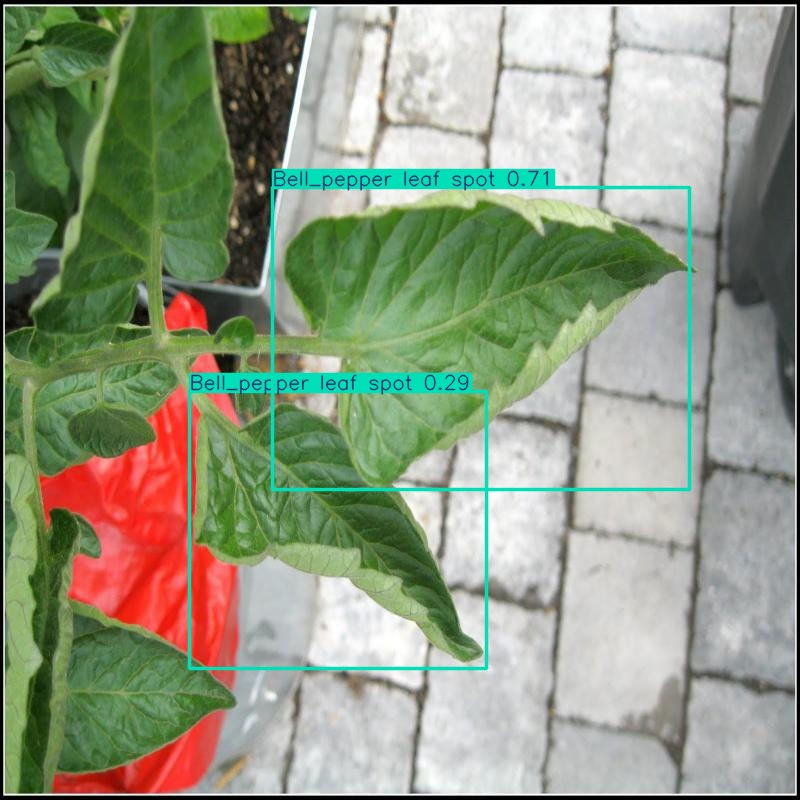

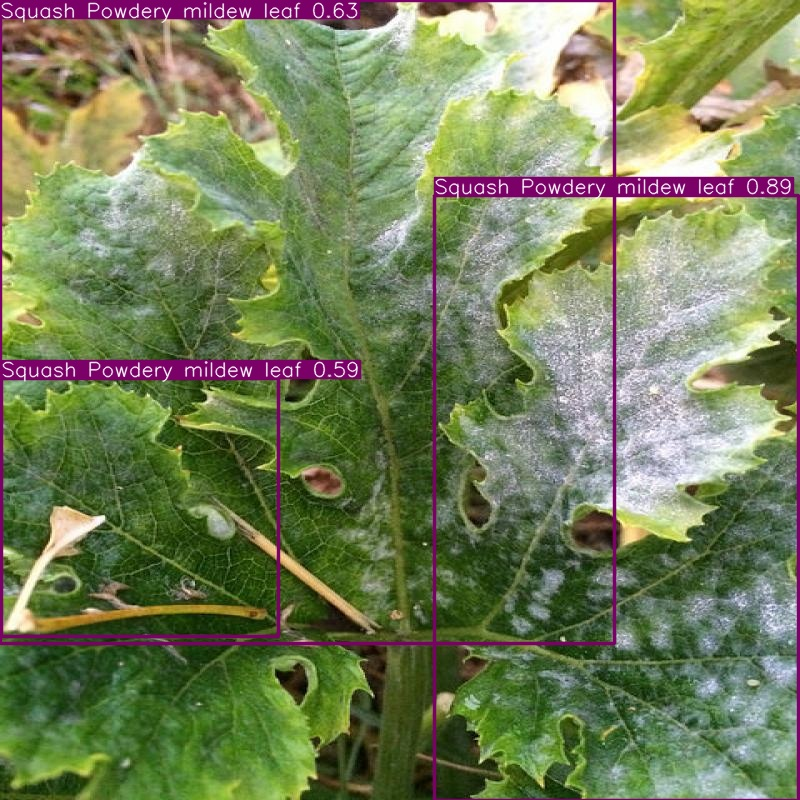

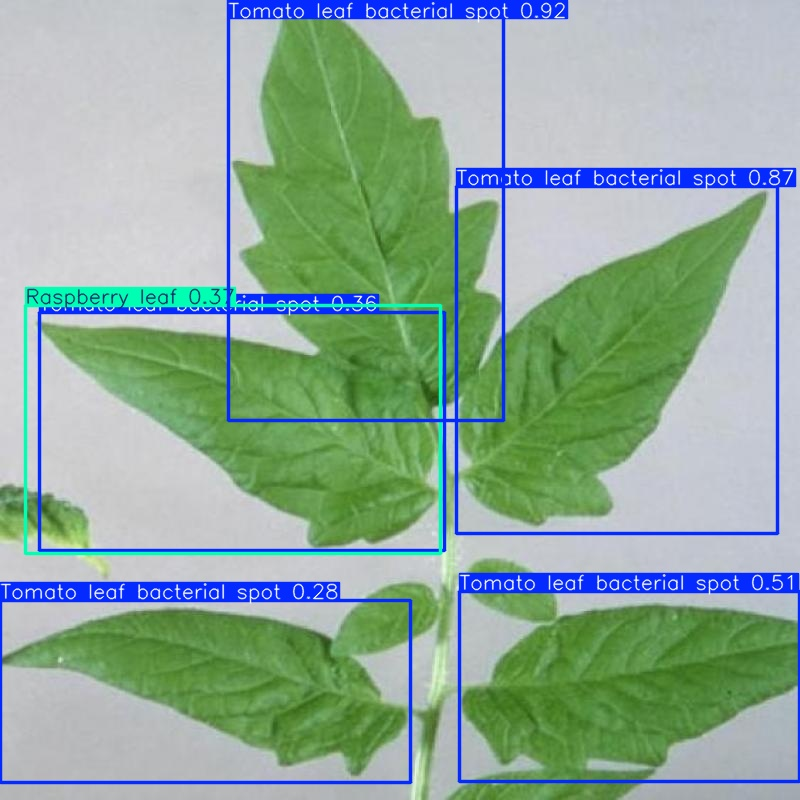

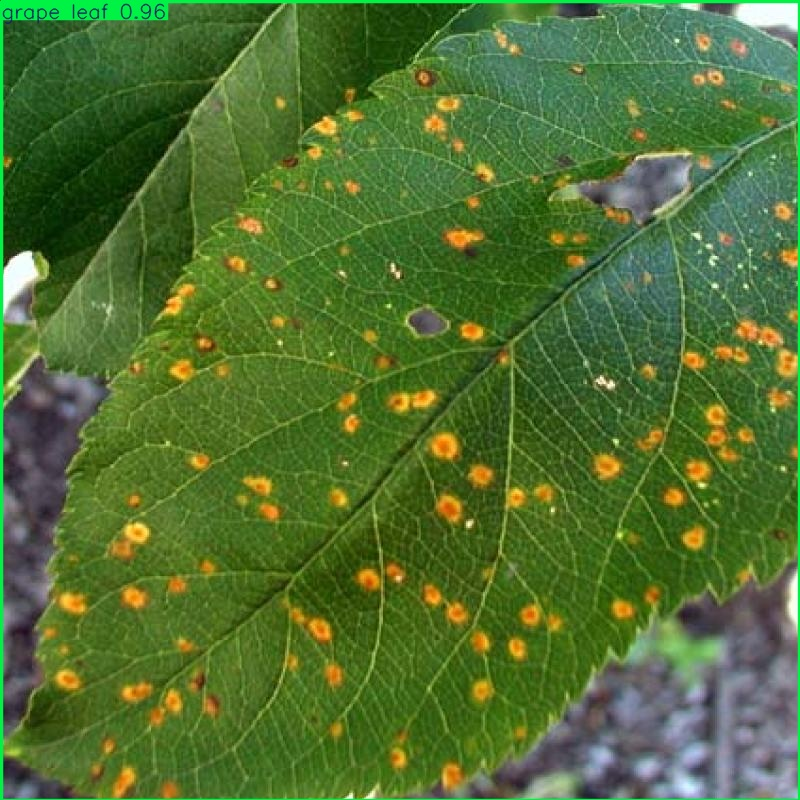

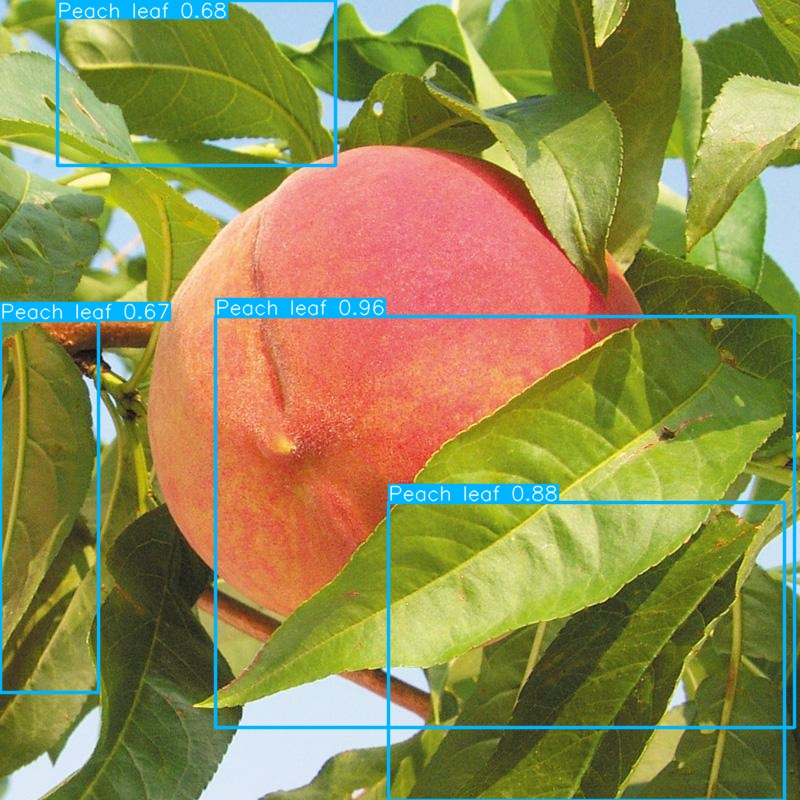

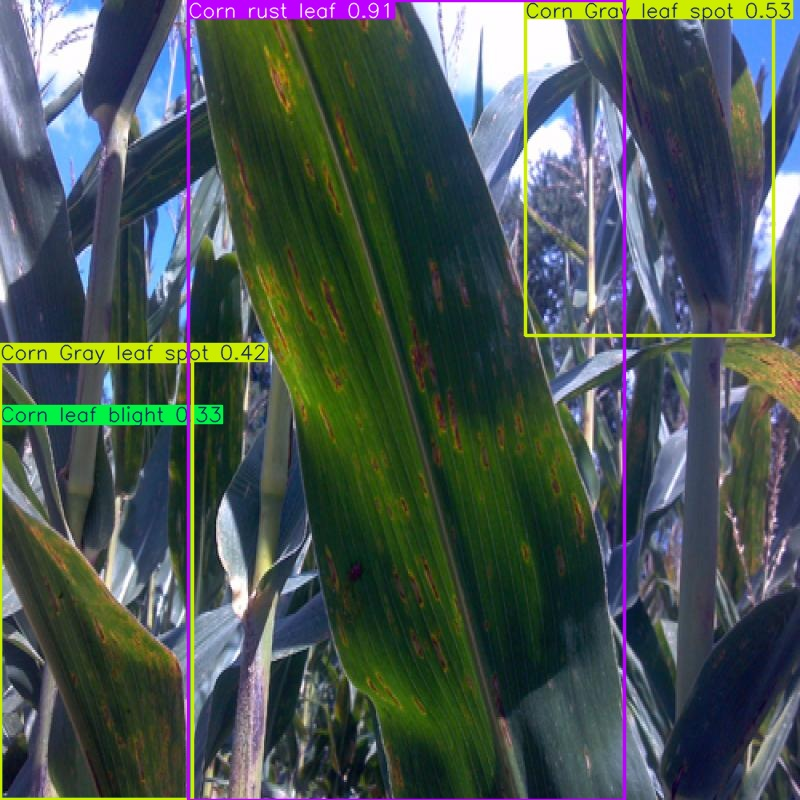

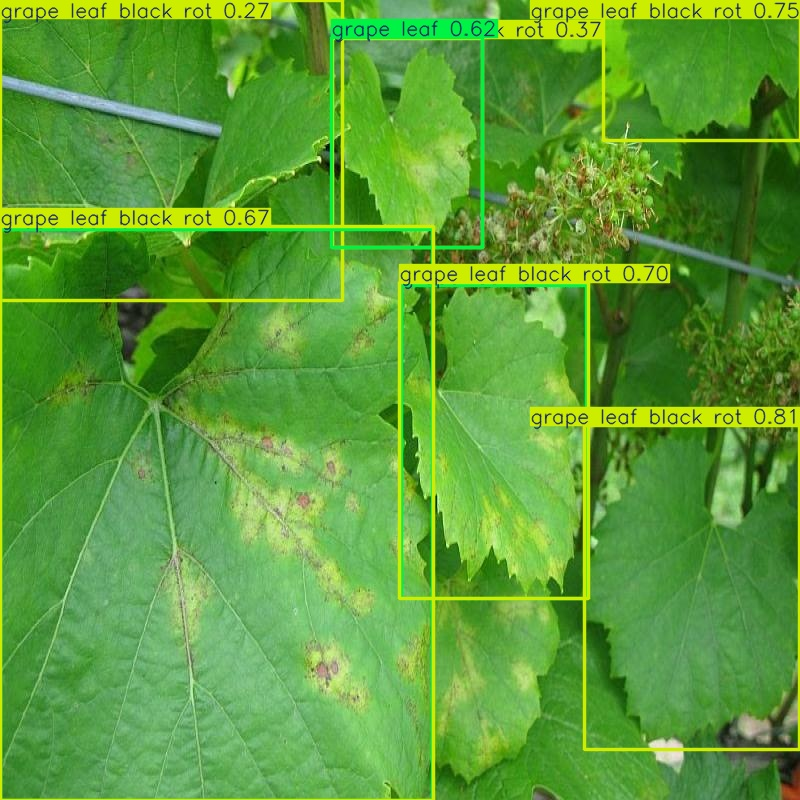

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")